In [57]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from os.path import join, isfile
from os import path, scandir, listdir

from source.aggregated_stats import process_details

pd.set_option("max_columns", 300)

In [2]:
def list_all_files(location='../input/', pattern=None, recursive=True):
    """
    This function returns a list of files at a given location (including subfolders)
    
    - location: path to the directory to be searched
    - pattern: part of the file name to be searched (ex. pattern='.csv' would return all the csv files)
    - recursive: boolean, if True the function calls itself for every subdirectory it finds
    """
    subdirectories= [f.path for f in scandir(location) if f.is_dir()]
    files = [join(location, f) for f in listdir(location) if isfile(join(location, f))]
    if recursive:
        for directory in subdirectories:
            files.extend(list_all_files(directory))
    if pattern:
        files = [f for f in files if pattern in f]
    return files

In [6]:
men_comp = list_all_files('data/raw_men/')

In [7]:
men_comp

['data/raw_men/SampleSubmissionStage1.csv',
 'data/raw_men/SampleSubmissionStage2.csv',
 'data/raw_men/MasseyOrdinals/MasseyOrdinals.csv',
 'data/raw_men/Stage2DataFiles/SecondaryTourneyTeams.csv',
 'data/raw_men/Stage2DataFiles/Conferences.csv',
 'data/raw_men/Stage2DataFiles/Cities.csv',
 'data/raw_men/Stage2DataFiles/Teams.csv',
 'data/raw_men/Stage2DataFiles/NCAATourneySlots.csv',
 'data/raw_men/Stage2DataFiles/NCAATourneySeedRoundSlots.csv',
 'data/raw_men/Stage2DataFiles/TeamCoaches.csv',
 'data/raw_men/Stage2DataFiles/GameCities.csv',
 'data/raw_men/Stage2DataFiles/Seasons.csv',
 'data/raw_men/Stage2DataFiles/SecondaryTourneyCompactResults.csv',
 'data/raw_men/Stage2DataFiles/NCAATourneyDetailedResults.csv',
 'data/raw_men/Stage2DataFiles/TeamSpellings.csv',
 'data/raw_men/Stage2DataFiles/NCAATourneyCompactResults.csv',
 'data/raw_men/Stage2DataFiles/TeamConferences.csv',
 'data/raw_men/Stage2DataFiles/RegularSeasonDetailedResults.csv',
 'data/raw_men/Stage2DataFiles/ConferenceT

# submission file

In [8]:
df = pd.read_csv(men_comp[0])
df[['year', 'Team_1', 'Team_2']] = pd.DataFrame(df['ID'].str.split('_').values.tolist(), index=df.index)
df['year'] = pd.to_numeric(df.year)
df.head()

,ID,Pred,year,Team_1,Team_2
0,2014_1107_1110,0.5,2014,1107,1110
1,2014_1107_1112,0.5,2014,1107,1112
2,2014_1107_1113,0.5,2014,1107,1113
3,2014_1107_1124,0.5,2014,1107,1124
4,2014_1107_1140,0.5,2014,1107,1140


In [9]:
df.year.value_counts(dropna=False)

2015    2278
2014    2278
2018    2278
2017    2278
2016    2278
Name: year, dtype: int64

In [10]:
df = pd.read_csv(men_comp[1])
df[['year', 'Team_1', 'Team_2']] = pd.DataFrame(df['ID'].str.split('_').values.tolist(), index=df.index)
df['year'] = pd.to_numeric(df.year)
df.head()

,ID,Pred,year,Team_1,Team_2
0,2019_1101_1113,0.5,2019,1101,1113
1,2019_1101_1120,0.5,2019,1101,1120
2,2019_1101_1124,0.5,2019,1101,1124
3,2019_1101_1125,0.5,2019,1101,1125
4,2019_1101_1133,0.5,2019,1101,1133


In [11]:
df.year.value_counts(dropna=False)

2019    2278
Name: year, dtype: int64

# Teams.csv

In [12]:
[file for file in men_comp if 'Teams.csv' in file]

['data/raw_men/Stage2DataFiles/SecondaryTourneyTeams.csv',
 'data/raw_men/Stage2DataFiles/Teams.csv',
 'data/raw_men/DataFiles/SecondaryTourneyTeams.csv',
 'data/raw_men/DataFiles/Teams.csv']

In [16]:
df = pd.read_csv('data/raw_men/Stage2DataFiles/Teams.csv')
df.shape

(366, 4)

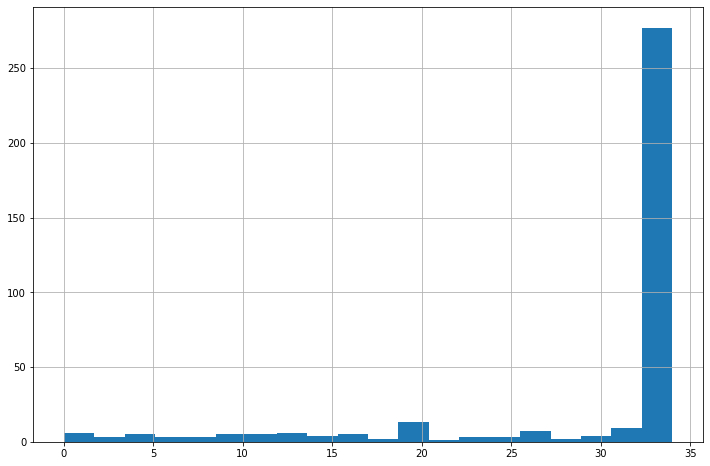

In [17]:
df['years_in_d1'] = df['LastD1Season'] - df['FirstD1Season']

df['years_in_d1'].hist(bins=20, figsize=(12,8))

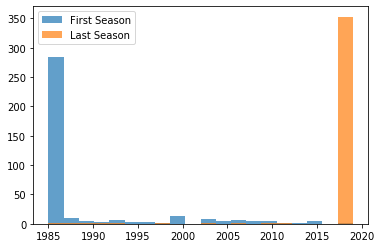

In [18]:
df.FirstD1Season.hist(bins=20, alpha=0.7, label='First Season')
df.LastD1Season.hist(bins=20, alpha=0.7, label='Last Season')
plt.grid(False)
plt.legend()

In [19]:
yr_count = pd.DataFrame({'year': np.arange(1985, 2020)})

for year in yr_count.year:
    df['is_in'] = 0
    df.loc[(df.FirstD1Season <= year) & (df.LastD1Season >= year), 'is_in'] = 1
    tot_teams = df.is_in.sum()
    yr_count.loc[yr_count.year == year, 'n_teams'] = tot_teams

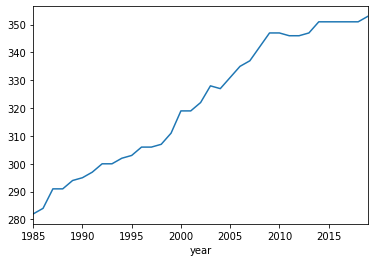

In [20]:
yr_count = yr_count.set_index('year')
yr_count.n_teams.plot()

# Seasons.csv

In [21]:
[file for file in men_comp if 'Seasons.csv' in file]

['data/raw_men/Stage2DataFiles/Seasons.csv',
 'data/raw_men/DataFiles/Seasons.csv']

In [24]:
df = pd.read_csv('data/raw_men/Stage2DataFiles/Seasons.csv')
print(df.shape)
df.head()

(35, 6)


,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/2/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast


# Regular season compact results

In [25]:
[file for file in men_comp if 'RegularSeasonCompact' in file]

['data/raw_men/Stage2DataFiles/RegularSeasonCompactResults.csv',
 'data/raw_men/DataFiles/RegularSeasonCompactResults.csv']

In [28]:
df = pd.read_csv('data/raw_men/Stage2DataFiles/RegularSeasonCompactResults.csv')
print(df.shape)
df.head()

(161552, 8)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


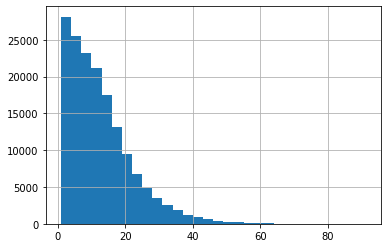

In [29]:
df['point_diff'] = df.WScore - df.LScore
df.point_diff.hist(bins=30)

In [30]:
df.describe()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT,point_diff
count,161552.000000,161552.000000,161552.000000,161552.000000,161552.000000,161552.000000,161552.000000,161552.000000
mean,2003.228731,74.665359,1286.919004,76.795125,1282.637498,64.692526,0.045137,12.102599
std,10.058660,33.670352,104.521630,12.066260,104.742961,11.349610,0.249751,9.414861
min,1985.000000,0.000000,1101.000000,34.000000,1101.000000,20.000000,0.000000,1.000000
25%,1995.000000,47.000000,1198.000000,69.000000,1191.000000,57.000000,0.000000,5.000000
50%,2004.000000,77.000000,1284.000000,76.000000,1280.000000,64.000000,0.000000,10.000000
75%,2012.000000,103.000000,1380.000000,84.000000,1375.000000,72.000000,0.000000,17.000000
max,2019.000000,132.000000,1466.000000,186.000000,1466.000000,150.000000,6.000000,91.000000


In [31]:
summaries = df[['Season', 
    'WScore', 
    'LScore', 
    'NumOT', 
    'point_diff']].groupby('Season').agg(['min', 'max', 'mean', 'median'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

,WScore_min,WScore_max,WScore_mean,WScore_median,LScore_min,LScore_max,LScore_mean,LScore_median,NumOT_min,NumOT_max,NumOT_mean,NumOT_median,point_diff_min,point_diff_max,point_diff_mean,point_diff_median
Season,,,,,,,,,,,,,,,,
1985,37,142,74.723040,74,27,140,63.860316,64,0,3,0.007760,0,1,60,10.862724,9
1986,35,151,74.813640,74,30,114,63.633888,63,0,2,0.002115,0,1,84,11.179752,9
1987,43,133,77.993870,77,25,111,66.770626,66,0,3,0.008429,0,1,73,11.223244,9
1988,40,152,79.773704,79,31,133,67.697092,67,0,2,0.003793,0,1,68,12.076612,10
1989,43,181,81.728511,81,30,150,69.530840,69,0,2,0.005697,0,1,70,12.197672,10
1990,36,173,80.846477,80,28,141,68.833622,68,0,3,0.006180,0,1,76,12.012855,10
1991,42,186,82.733932,82,27,140,70.057240,69,0,2,0.007519,0,1,68,12.676692,10
1992,41,159,79.992004,79,25,116,67.144657,67,0,3,0.003150,0,1,82,12.847347,11
1993,40,155,79.508790,79,27,112,67.301858,67,0,2,0.004771,0,1,81,12.206931,10


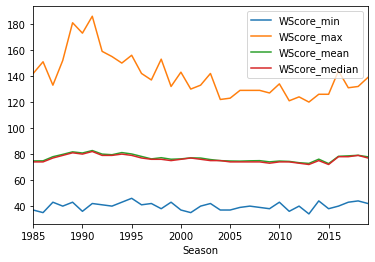

In [32]:
summaries[[col for col in summaries.columns if 'WScore' in col and 'sum' not in col]].plot()

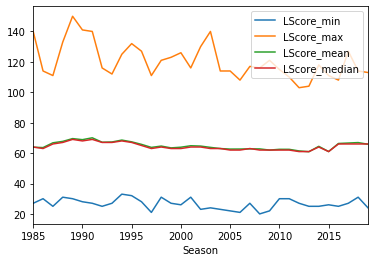

In [33]:
summaries[[col for col in summaries.columns if 'LScore' in col and 'sum' not in col]].plot()

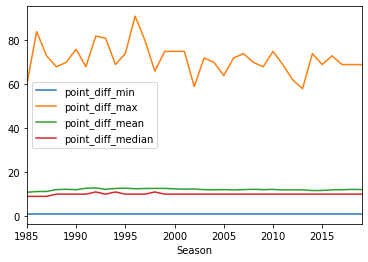

In [34]:
summaries[[col for col in summaries.columns if 'point_diff' in col and 'sum' not in col]].plot()

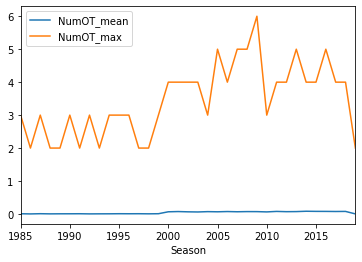

In [35]:
summaries[['NumOT_mean', 'NumOT_max']].plot()

In [36]:
summaries = df[['Season', 'WLoc',
    'WScore', 
    'LScore', 
    'NumOT', 
    'point_diff']].groupby(['Season', 'WLoc']).agg(['min', 'max', 'mean', 'median', 'count'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

WScore_min  WScore_max  WScore_mean  WScore_median  WScore_count  \
Season WLoc                                                                     
1985   A             41         142    72.491023             72          1114   
       H             37         128    75.935383             75          2244   
       N             43         121    74.105541             74           379   
1986   A             35         126    72.163964             72          1110   
       H             42         151    76.169076             76          2283   
...                 ...         ...          ...            ...           ...   
2018   H             47         132    79.998109             80          3173   
       N             44         116    77.362460             77           618   
2019   A             47         116    76.432574             76          1713   
       H             42         139    78.884750             78          3141   
       N             50         118    76.835796             77           609   

             LScore_min  LScore_max  LScore_mean  LScore_median  LScore_count  \
Season WLoc                                                                     
1985   A             35         140    63.952424           63.0          1114   
       H             27         105    63.839127           64.0          2244   
       N             37          96    63.715040           64.0           379   
1986   A             30          97    63.426126           63.0          1110   
       H             31         114    63.786684           63.0          2283   
...                 ...         ...          ...            ...           ...   
2018   H             31         113    66.271352           66.0          3173   
       N             42         109    66.796117           66.5           618   
2019   A             24         106    66.846468           66.0          1713   
       H             33         113    65.209806           65.0          3141   
       N             38         107    65.816092           66.0           609   

             NumOT_min  NumOT_max  NumOT_mean  NumOT_median  NumOT_count  \
Season WLoc                                                                
1985   A             0          3    0.007181             0         1114   
       H             0          1    0.002228             0         2244   
       N             0          3    0.042216             0          379   
1986   A             0          2    0.001802             0         1110   
       H             0          1    0.001752             0         2283   
...                ...        ...         ...           ...          ...   
2018   H             0          3    0.070596             0         3173   
       N             0          4    0.063107             0          618   
2019   A             0          0    0.000000             0         1713   
       H             0          2    0.000955             0         3141   
       N             0          1    0.018062             0          609   

             point_diff_min  point_diff_max  point_diff_mean  \
Season WLoc                                                    
1985   A                  1              43         8.538600   
       H                  1              60        12.096257   
       N                  1              47        10.390501   
1986   A                  1              53         8.737838   
       H                  1              53        12.382392   
...                     ...             ...              ...   
2018   H                  1              69        13.726757   
       N                  1              47        10.566343   
2019   A                  1              59         9.586106   
       H                  1              69        13.674944   
       N                  1              39        11.019704   

             point_diff_median  point_diff_count  
Season WLoc                     

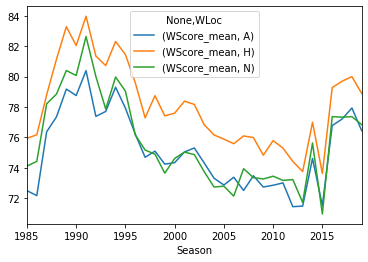

In [37]:
summaries[['WScore_mean']].unstack().plot()

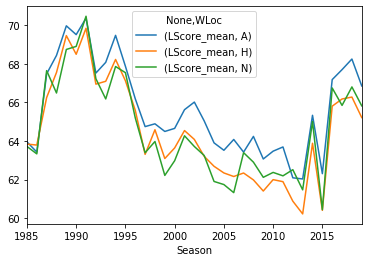

In [38]:
summaries[['LScore_mean']].unstack().plot()

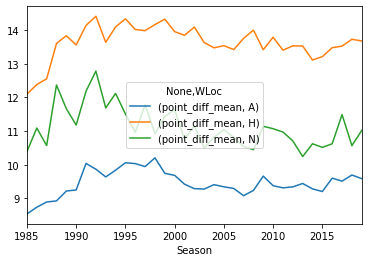

In [39]:
summaries[['point_diff_mean']].unstack().plot()

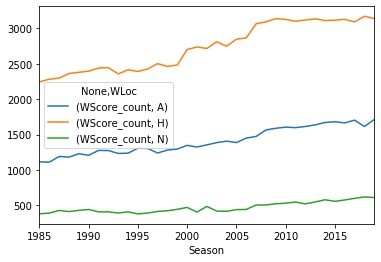

In [40]:
summaries[['WScore_count']].unstack().plot()

# Playoff compact results

In [41]:
[file for file in men_comp if 'NCAATourneyCompact' in file]

['data/raw_men/Stage2DataFiles/NCAATourneyCompactResults.csv',
 'data/raw_men/DataFiles/NCAATourneyCompactResults.csv']

In [43]:
df = pd.read_csv('data/raw_men/Stage2DataFiles/NCAATourneyCompactResults.csv')
print(df.shape)
df.head()

(2184, 8)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


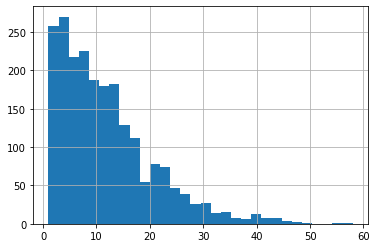

In [44]:
df['point_diff'] = df.WScore - df.LScore
df.point_diff.hist(bins=30)

In [45]:
summaries = df[['Season', 
    'WScore', 
    'LScore', 
    'NumOT', 
    'point_diff']].groupby('Season').agg(['min', 'max', 'mean', 'median'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

,WScore_min,WScore_max,WScore_mean,WScore_median,LScore_min,LScore_max,LScore_mean,LScore_median,NumOT_min,NumOT_max,NumOT_mean,NumOT_median,point_diff_min,point_diff_max,point_diff_mean,point_diff_median
Season,,,,,,,,,,,,,,,,
1985,46,96,68.047619,67.0,38,84,59.333333,58.0,0,1,0.047619,0,1,25,8.714286,7.0
1986,58,101,76.841270,74.0,43,87,66.142857,65.0,0,1,0.079365,0,1,49,10.698413,8.0
1987,57,113,82.603175,83.0,51,97,71.984127,71.0,0,1,0.079365,0,1,34,10.619048,8.0
1988,54,123,83.349206,83.0,47,115,71.285714,72.0,0,1,0.031746,0,1,40,12.063492,10.0
1989,50,124,85.222222,85.0,46,101,73.253968,73.0,0,1,0.047619,0,1,43,11.968254,11.0
1990,49,149,80.761905,78.0,46,115,70.761905,70.0,0,1,0.079365,0,1,35,10.000000,7.0
1991,50,117,80.079365,79.0,48,90,67.809524,68.0,0,1,0.063492,0,1,41,12.269841,10.0
1992,51,106,81.238095,81.0,43,103,68.730159,69.0,0,1,0.063492,0,1,39,12.507937,10.0
1993,54,112,81.761905,81.0,50,84,66.841270,68.0,0,1,0.063492,0,2,45,14.920635,13.0


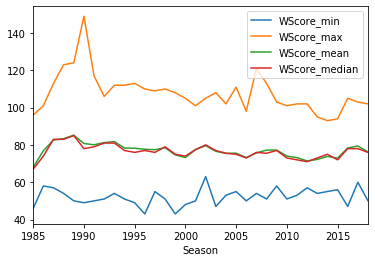

In [46]:
summaries[[col for col in summaries.columns if 'WScore' in col and 'sum' not in col]].plot()

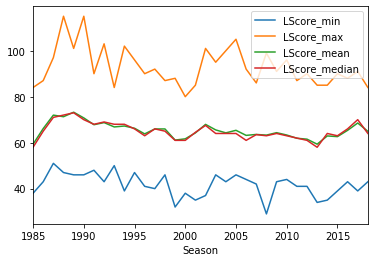

In [47]:
summaries[[col for col in summaries.columns if 'LScore' in col and 'sum' not in col]].plot()

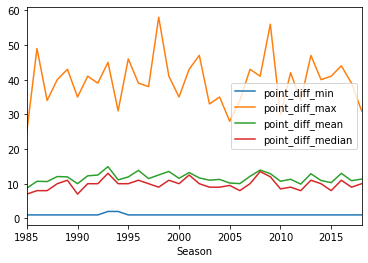

In [48]:
summaries[[col for col in summaries.columns if 'point_diff' in col and 'sum' not in col]].plot()

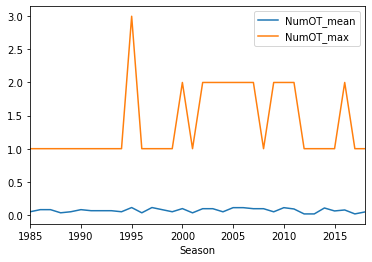

In [50]:
summaries[['NumOT_mean', 'NumOT_max']].plot()

In [51]:
df.WLoc.value_counts()

N    2184
Name: WLoc, dtype: int64

# Detailed results

In [52]:
[col for col in men_comp if 'Detailed' in col]

['data/raw_men/Stage2DataFiles/NCAATourneyDetailedResults.csv',
 'data/raw_men/Stage2DataFiles/RegularSeasonDetailedResults.csv',
 'data/raw_men/DataFiles/NCAATourneyDetailedResults.csv',
 'data/raw_men/DataFiles/RegularSeasonDetailedResults.csv']

In [58]:
reg_season = pd.read_csv('data/raw_men/Stage2DataFiles/RegularSeasonDetailedResults.csv')
print(df.shape)
stats = [col for col in reg_season.columns if 'W' in col and 'ID' not in col and 'Loc' not in col]

reg_season = process_details(reg_season)

reg_season.head()

(2184, 9)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,WFG_perc,WFGM2,WFGA2,WFG2_perc,WFG3_perc,WFT_perc,WTot_Reb,WFGM_no_ast,WFGM_no_ast_perc,Wpossessions,Woff_rating,Wscoring_opp,WTO_perposs,LFG_perc,LFGM2,LFGA2,LFG2_perc,LFG3_perc,LFT_perc,LTot_Reb,LFGM_no_ast,LFGM_no_ast_perc,Lpossessions,Loff_rating,Lscoring_opp,LTO_perposs,Wdef_rating,Ldef_rating,Wimpact,Limpact,WDef_effort,LDef_effort,WReb_opp,LReb_opp,Score_diff,FGM_diff,FGA_diff,FGM3_diff,FGA3_diff,FTM_diff,FTA_diff,OR_diff,DR_diff,Ast_diff,TO_diff,Stl_diff,Blk_diff,PF_diff,FGM2_diff,FGA2_diff,Tot_Reb_diff,FGM_no_ast_diff,Def_effort_diff,Reb_opp_diff,possessions_diff,off_rating_diff,def_rating_diff,scoring_opp_diff,TO_perposs_diff,impact_diff
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20,0.465517,24,44,0.545455,0.214286,0.611111,38,14,0.518519,58.450,116.338751,1.138580,0.393499,0.415094,20,43,0.465116,0.200000,0.727273,32,14,0.636364,50.550,122.650841,1.255193,0.356083,122.650841,116.338751,0.543379,0.456621,80.264151,70.965517,0.774194,0.709677,6,5,5,1,4,-5,-4,4,2,5,5,-2,-1,2,4,1,6,0,9.298634,0.064516,7.900,-6.312090,6.312090,-0.116613,0.037416,0.086758
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16,0.419355,18,42,0.428571,0.400000,0.526316,43,10,0.384615,50.975,137.322217,1.393330,0.255027,0.358209,18,43,0.418605,0.250000,0.450000,45,17,0.708333,49.500,127.272727,1.545455,0.242424,127.272727,137.322217,0.583710,0.416290,95.000000,83.290323,0.651163,0.694444,7,2,-5,2,-4,1,-1,-5,3,9,1,-4,-2,2,0,-1,-2,-7,11.709677,-0.043282,1.475,10.049490,-10.049490,-0.152124,0.012603,0.167421
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23,0.413793,16,40,0.400000,0.444444,0.586207,43,9,0.375000,37.225,196.104768,1.928140,0.268637,0.301370,19,47,0.404255,0.115385,0.608696,53,13,0.590909,43.075,141.613465,1.948346,0.278584,141.613465,196.104768,0.664740,0.335260,92.150685,88.724138,0.509804,0.647059,12,2,-15,5,-8,3,6,-14,4,6,-2,3,-3,2,-3,-7,-10,-4,3.426547,-0.137255,-5.850,54.491303,-54.491303,-0.020206,-0.009947,0.329480
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23,0.473684,15,29,0.517241,0.333333,0.548387,25,7,0.388889,29.275,191.289496,1.801025,0.409906,0.367347,12,27,0.444444,0.272727,0.533333,37,9,0.500000,43.875,113.960114,1.279202,0.433048,113.960114,191.289496,0.619048,0.380952,65.102041,84.921053,0.612903,1.000000,6,0,-11,-3,-13,9,16,-11,-1,2,-7,10,-1,-5,3,2,-12,-2,-19.819012,-0.387097,-14.600,77.329382,-77.329382,0.521822,-0.023142,0.238095
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14,0.491803,24,47,0.510638,0.428571,0.846154,39,18,0.600000,51.825,148.576942,1.296189,0.270140,0.387097,18,46,0.391304,0.375000,0.629630,36,12,0.500000,38.175,185.985593,1.960052,0.261952,185.985593,148.576942,0.573123,0.426877,82.548387,50.081967,0.578947,0.483871,6,6,-1,0,-2,-6,-14,-4,7,0,4,-3,3,6,6,1,3,6,32.466420,0.095076,13.650,-37.408651,37.408651,-0.663863,0.008188,0.146245


In [59]:
not_sum = ['WTeamID', 'DayNum', 'LTeamID']
to_sum = [col for col in reg_season.columns if col not in not_sum]

summaries = reg_season[to_sum].groupby(['Season', 'WLoc']).agg(['min', 'max', 'mean', 'median', 'count'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries.sample(5)

,,WScore_min,WScore_max,WScore_mean,WScore_median,WScore_count,LScore_min,LScore_max,LScore_mean,LScore_median,LScore_count,NumOT_min,NumOT_max,NumOT_mean,NumOT_median,NumOT_count,WFGM_min,WFGM_max,WFGM_mean,WFGM_median,WFGM_count,WFGA_min,WFGA_max,WFGA_mean,WFGA_median,WFGA_count,WFGM3_min,WFGM3_max,WFGM3_mean,WFGM3_median,WFGM3_count,WFGA3_min,WFGA3_max,WFGA3_mean,WFGA3_median,WFGA3_count,WFTM_min,WFTM_max,WFTM_mean,WFTM_median,WFTM_count,WFTA_min,WFTA_max,WFTA_mean,WFTA_median,WFTA_count,WOR_min,WOR_max,WOR_mean,WOR_median,WOR_count,WDR_min,WDR_max,WDR_mean,WDR_median,WDR_count,WAst_min,WAst_max,WAst_mean,WAst_median,WAst_count,WTO_min,WTO_max,WTO_mean,WTO_median,WTO_count,WStl_min,WStl_max,WStl_mean,WStl_median,WStl_count,WBlk_min,WBlk_max,WBlk_mean,WBlk_median,WBlk_count,WPF_min,WPF_max,WPF_mean,WPF_median,WPF_count,LFGM_min,LFGM_max,LFGM_mean,LFGM_median,LFGM_count,LFGA_min,LFGA_max,LFGA_mean,LFGA_median,LFGA_count,LFGM3_min,LFGM3_max,LFGM3_mean,LFGM3_median,LFGM3_count,LFGA3_min,LFGA3_max,LFGA3_mean,LFGA3_median,LFGA3_count,LFTM_min,LFTM_max,LFTM_mean,LFTM_median,LFTM_count,LFTA_min,LFTA_max,LFTA_mean,LFTA_median,LFTA_count,LOR_min,LOR_max,LOR_mean,LOR_median,LOR_count,LDR_min,LDR_max,LDR_mean,LDR_median,LDR_count,LAst_min,LAst_max,LAst_mean,LAst_median,LAst_count,LTO_min,LTO_max,LTO_mean,LTO_median,LTO_count,LStl_min,LStl_max,LStl_mean,LStl_median,LStl_count,LBlk_min,LBlk_max,LBlk_mean,LBlk_median,LBlk_count,LPF_min,LPF_max,LPF_mean,LPF_median,LPF_count,WFG_perc_min,WFG_perc_max,WFG_perc_mean,WFG_perc_median,WFG_perc_count,...,WDef_effort_min,WDef_effort_max,WDef_effort_mean,WDef_effort_median,WDef_effort_count,LDef_effort_min,LDef_effort_max,LDef_effort_mean,LDef_effort_median,LDef_effort_count,WReb_opp_min,WReb_opp_max,WReb_opp_mean,WReb_opp_median,WReb_opp_count,LReb_opp_min,LReb_opp_max,LReb_opp_mean,LReb_opp_median,LReb_opp_count,Score_diff_min,Score_diff_max,Score_diff_mean,Score_diff_median,Score_diff_count,FGM_diff_min,FGM_diff_max,FGM_diff_mean,FGM_diff_median,FGM_diff_count,FGA_diff_min,FGA_diff_max,FGA_diff_mean,FGA_diff_median,FGA_diff_count,FGM3_diff_min,FGM3_diff_max,FGM3_diff_mean,FGM3_diff_median,FGM3_diff_count,FGA3_diff_min,FGA3_diff_max,FGA3_diff_mean,FGA3_diff_median,FGA3_diff_count,FTM_diff_min,FTM_diff_max,FTM_diff_mean,FTM_diff_median,FTM_diff_count,FTA_diff_min,FTA_diff_max,FTA_diff_mean,FTA_diff_median,FTA_diff_count,OR_diff_min,OR_diff_max,OR_diff_mean,OR_diff_median,OR_diff_count,DR_diff_min,DR_diff_max,DR_diff_mean,DR_diff_median,DR_diff_count,Ast_diff_min,Ast_diff_max,Ast_diff_mean,Ast_diff_median,Ast_diff_count,TO_diff_min,TO_diff_max,TO_diff_mean,TO_diff_median,TO_diff_count,Stl_diff_min,Stl_diff_max,Stl_diff_mean,Stl_diff_median,Stl_diff_count,Blk_diff_min,Blk_diff_max,Blk_diff_mean,Blk_diff_median,Blk_diff_count,PF_diff_min,PF_diff_max,PF_diff_mean,PF_diff_median,PF_diff_count,FGM2_diff_min,FGM2_diff_max,FGM2_diff_mean,FGM2_diff_median,FGM2_diff_count,FGA2_diff_min,FGA2_diff_max,FGA2_diff_mean,FGA2_diff_median,FGA2_diff_count,Tot_Reb_diff_min,Tot_Reb_diff_max,Tot_Reb_diff_mean,Tot_Reb_diff_median,Tot_Reb_diff_count,FGM_no_ast_diff_min,FGM_no_ast_diff_max,FGM_no_ast_diff_mean,FGM_no_ast_diff_median,FGM_no_ast_diff_count,Def_effort_diff_min,Def_effort_diff_max,Def_effort_diff_mean,Def_effort_diff_median,Def_effort_diff_count,Reb_opp_diff_min,Reb_opp_diff_max,Reb_opp_diff_mean,Reb_opp_diff_median,Reb_opp_diff_count,possessions_diff_min,possessions_diff_max,possessions_diff_mean,possessions_diff_median,possessions_diff_count,off_rating_diff_min,off_rating_diff_max,off_rating_diff_mean,off_rating_diff_median,off_rating_diff_count,def_rating_diff_min,def_rating_diff_max,def_rating_diff_mean,def_rating_diff_median,def_rating_diff_count,scoring_opp_diff_min,scoring_opp_diff_max,scoring_opp_diff_mean,scoring_opp_diff_median,scoring_opp_diff_count,TO_perposs_diff_min,TO_perposs_diff_max,TO_perposs_diff_mean,TO_perposs_diff_median,TO_perposs_diff_count,impact_diff_min,impact_diff_max,impact_diff_m

In [60]:
[c for c in summaries.columns if ('_perc_mean' in c or '_frac_mean' in c) and c.startswith('W')]

['WFG_perc_mean',
 'WFG2_perc_mean',
 'WFG3_perc_mean',
 'WFT_perc_mean',
 'WFGM_no_ast_perc_mean']

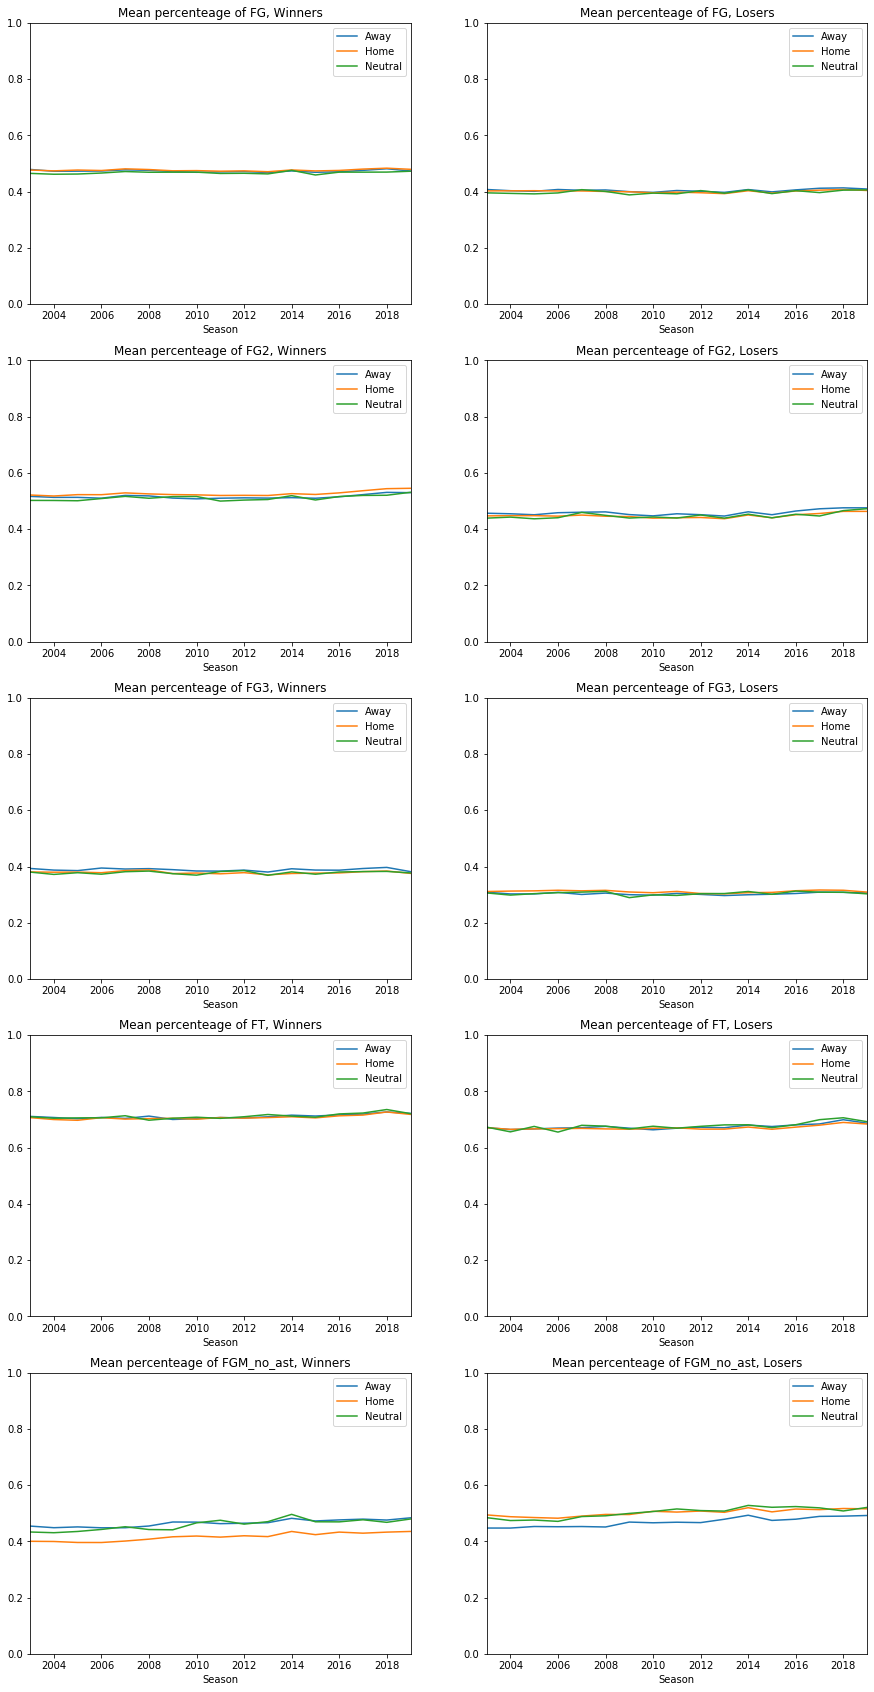

In [65]:
fig, ax= plt.subplots(5,2, figsize=(15, 6*5))

i = 0

for col in [c for c in summaries.columns if '_perc_mean' in c and c.startswith('W')]:
    name = col.split('_perc_')[0][1:]
    summaries[col].unstack().plot(title='Mean percenteage of '+name+', Winners',ax=ax[i][0])
    summaries['L'+name+'_perc_mean'].unstack().plot(title='Mean percenteage of '+name+', Losers',ax=ax[i][1])
    ax[i][0].legend(labels=['Away', 'Home', 'Neutral'])
    ax[i][1].legend(labels=['Away', 'Home', 'Neutral'])
    ax[i][0].set_ylim(0,1)
    ax[i][1].set_ylim(0,1)
    i += 1

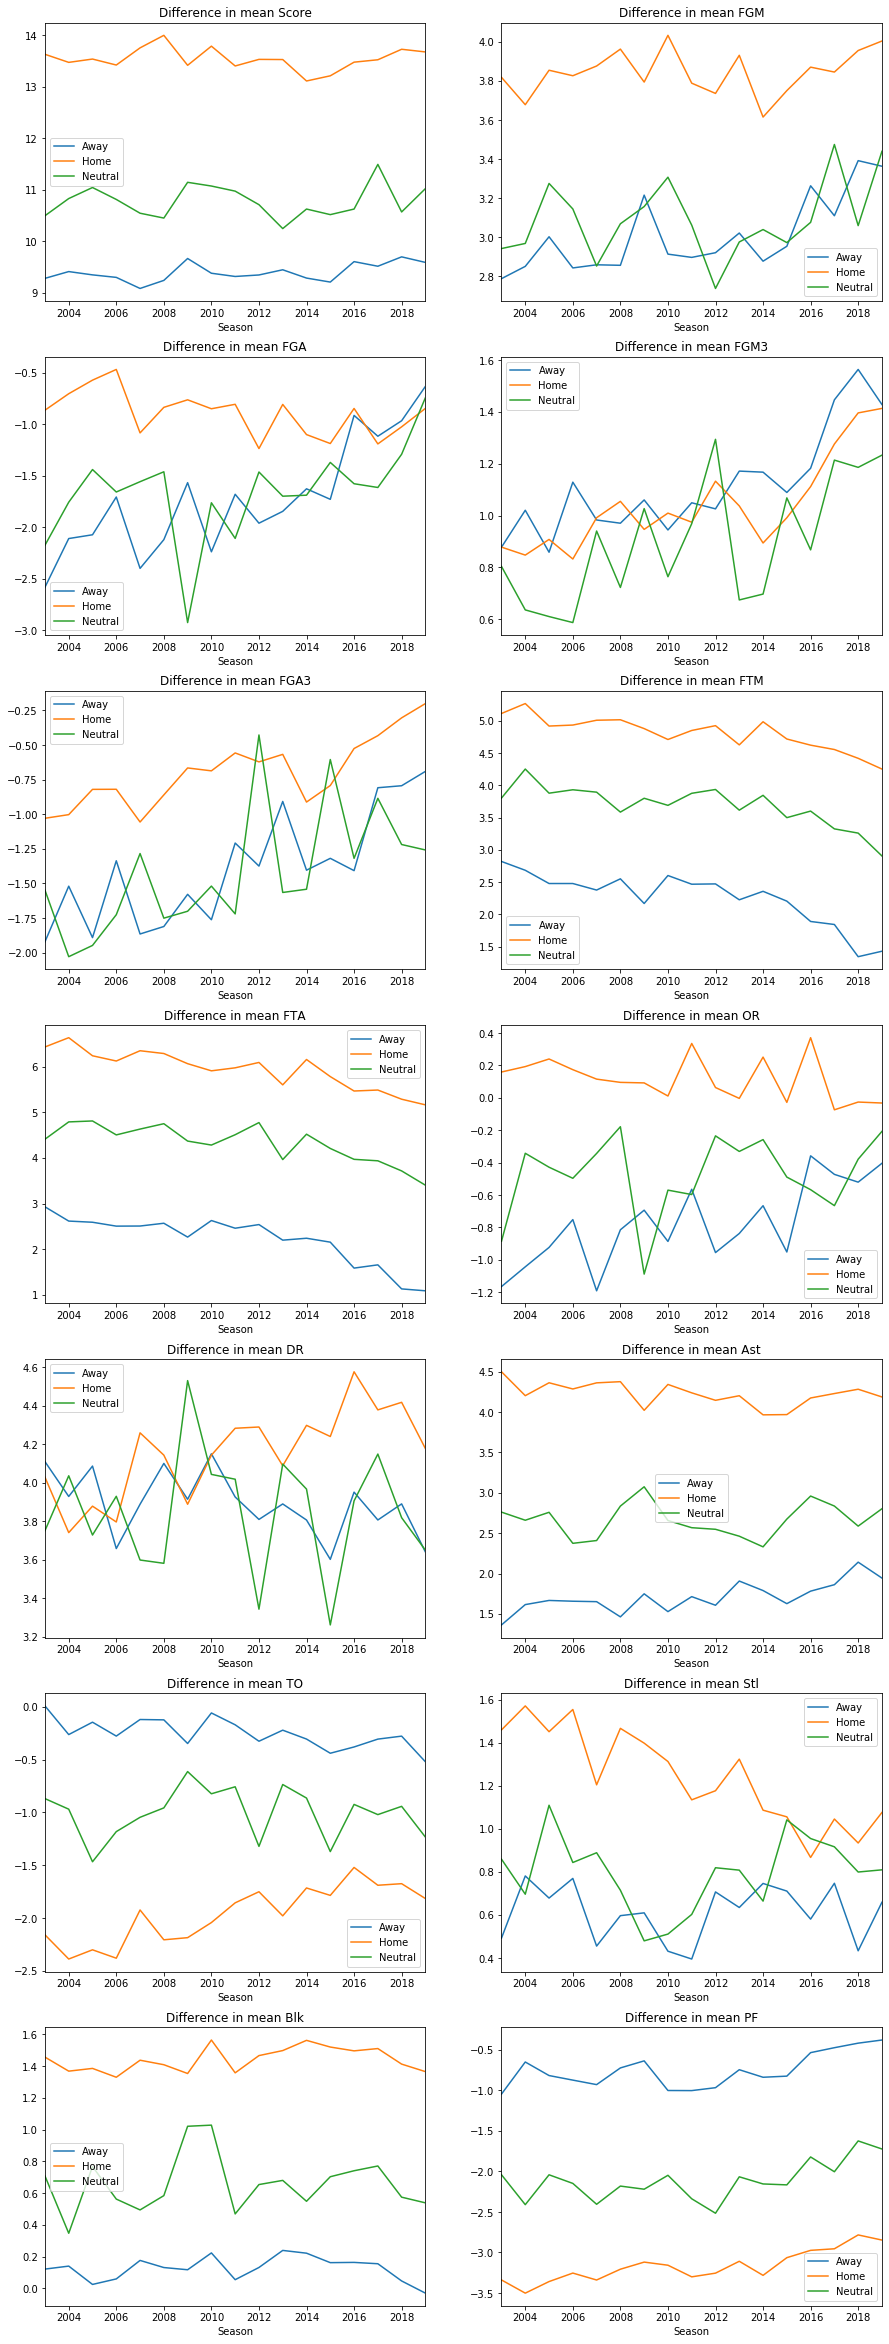

In [66]:
fig, ax= plt.subplots(7,2, figsize=(15, 6*7))

i, j = 0, 0

for col in stats:
    name = col[1:]
    summaries[[c for c in summaries.columns if name+'_diff_mean' in c]].unstack().plot(title='Difference in mean '+name,ax=ax[i][j])
    ax[i][j].legend(labels=['Away', 'Home', 'Neutral'])
    if j == 0:
        j = 1
    else:
        j = 0
        i += 1

In [164]:
playoff = pd.read_csv('raw_data/mens-machine-learning-competition-2019/DataFiles/NCAATourneyDetailedResults.csv')

stats = [col for col in playoff.columns if 'W' in col and 'ID' not in col and 'Loc' not in col]

playoff= process_details(playoff)

playoff.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,Score_diff,Score_binary,FGM_diff,FGM_binary,FGA_diff,FGA_binary,FGM3_diff,FGM3_binary,FGA3_diff,FGA3_binary,FTM_diff,FTM_binary,FTA_diff,FTA_binary,OR_diff,OR_binary,DR_diff,DR_binary,Ast_diff,Ast_binary,TO_diff,TO_binary,Stl_diff,Stl_binary,Blk_diff,Blk_binary,PF_diff,PF_binary,WFG_perc,WFGM2,WFGA2,WFG2_perc,WFG3_perc,WFT_perc,WTot_Reb,WFGM_no_ast,WFGM_no_ast_perc,LFG_perc,LFGM2,LFGA2,LFG2_perc,LFG3_perc,LFT_perc,LTot_Reb,LFGM_no_ast,LFGM_no_ast_perc,Game_Rebounds,WReb_frac,LReb_frac
0,2003,134,1421,92,1411,84,N,1,32,69,11,29,17,26,14,30,17,12,5,3,22,29,67,12,31,14,31,17,28,16,15,5,0,22,8,1,3,1,2,1,-1,0,-2,0,3,1,-5,0,-3,0,2,1,1,1,-3,0,0,0,3,1,0,0,0.463768,21,40,0.525000,0.379310,0.653846,44,15,0.468750,0.432836,17,36,0.472222,0.387097,0.451613,45,13,0.448276,89,0.494382,0.505618
1,2003,136,1112,80,1436,51,N,0,31,66,7,23,11,14,11,36,22,16,10,7,8,20,64,4,16,7,7,8,26,12,17,10,3,15,29,1,11,1,2,1,3,1,7,1,4,1,7,1,3,1,10,1,10,1,-1,0,0,0,4,1,-7,0,0.469697,24,43,0.558140,0.304348,0.785714,47,9,0.290323,0.312500,16,48,0.333333,0.250000,1.000000,34,8,0.400000,81,0.580247,0.419753
2,2003,136,1113,84,1272,71,N,0,31,59,6,14,16,22,10,27,18,9,7,4,19,25,69,7,28,14,21,20,22,11,12,2,5,18,13,1,6,1,-10,0,-1,0,-14,0,2,1,1,1,-10,0,5,1,7,1,-3,0,5,1,-1,0,1,1,0.525424,25,45,0.555556,0.428571,0.727273,37,13,0.419355,0.362319,18,41,0.439024,0.250000,0.666667,42,14,0.560000,79,0.468354,0.531646
3,2003,136,1141,79,1166,73,N,0,29,53,3,7,18,25,11,20,15,18,13,1,19,27,60,7,17,12,17,14,17,20,21,6,6,21,6,1,2,1,-7,0,-4,0,-10,0,6,1,8,1,-3,0,3,1,-5,0,-3,0,7,1,-5,0,-2,0,0.547170,26,46,0.565217,0.428571,0.720000,31,14,0.482759,0.450000,20,43,0.465116,0.411765,0.705882,31,7,0.259259,62,0.500000,0.500000
4,2003,136,1143,76,1301,74,N,1,27,64,7,20,15,23,18,20,17,13,8,2,14,25,56,9,21,15,20,10,26,16,14,5,8,19,2,1,2,1,8,1,-2,0,-1,0,0,0,3,1,8,1,-6,0,1,1,-1,0,3,1,-6,0,-5,0,0.421875,20,44,0.454545,0.350000,0.652174,38,10,0.370370,0.446429,16,35,0.457143,0.428571,0.750000,36,9,0.360000,74,0.513514,0.486486


In [165]:
not_sum = ['WTeamID', 'DayNum', 'LTeamID']
to_sum = [col for col in playoff.columns if col not in not_sum]

summaries = playoff[to_sum].groupby(['Season']).agg(['min', 'max', 'mean', 'median', 'count'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries

,WScore_min,WScore_max,WScore_mean,WScore_median,WScore_count,LScore_min,LScore_max,LScore_mean,LScore_median,LScore_count,NumOT_min,NumOT_max,NumOT_mean,NumOT_median,NumOT_count,WFGM_min,WFGM_max,WFGM_mean,WFGM_median,WFGM_count,WFGA_min,WFGA_max,WFGA_mean,WFGA_median,WFGA_count,WFGM3_min,WFGM3_max,WFGM3_mean,WFGM3_median,WFGM3_count,WFGA3_min,WFGA3_max,WFGA3_mean,WFGA3_median,WFGA3_count,WFTM_min,WFTM_max,WFTM_mean,WFTM_median,WFTM_count,WFTA_min,WFTA_max,WFTA_mean,WFTA_median,WFTA_count,WOR_min,WOR_max,WOR_mean,WOR_median,WOR_count,WDR_min,WDR_max,WDR_mean,WDR_median,WDR_count,WAst_min,WAst_max,WAst_mean,WAst_median,WAst_count,WTO_min,WTO_max,WTO_mean,WTO_median,WTO_count,WStl_min,WStl_max,WStl_mean,WStl_median,WStl_count,WBlk_min,WBlk_max,WBlk_mean,WBlk_median,WBlk_count,WPF_min,WPF_max,WPF_mean,WPF_median,WPF_count,LFGM_min,LFGM_max,LFGM_mean,LFGM_median,LFGM_count,LFGA_min,LFGA_max,LFGA_mean,LFGA_median,LFGA_count,LFGM3_min,LFGM3_max,LFGM3_mean,LFGM3_median,LFGM3_count,LFGA3_min,LFGA3_max,LFGA3_mean,LFGA3_median,LFGA3_count,LFTM_min,LFTM_max,LFTM_mean,LFTM_median,LFTM_count,LFTA_min,LFTA_max,LFTA_mean,LFTA_median,LFTA_count,LOR_min,LOR_max,LOR_mean,LOR_median,LOR_count,LDR_min,LDR_max,LDR_mean,LDR_median,LDR_count,LAst_min,LAst_max,LAst_mean,LAst_median,LAst_count,LTO_min,LTO_max,LTO_mean,LTO_median,LTO_count,LStl_min,LStl_max,LStl_mean,LStl_median,LStl_count,LBlk_min,LBlk_max,LBlk_mean,LBlk_median,LBlk_count,LPF_min,LPF_max,LPF_mean,LPF_median,LPF_count,Score_diff_min,Score_diff_max,Score_diff_mean,Score_diff_median,Score_diff_count,...,Ast_binary_min,Ast_binary_max,Ast_binary_mean,Ast_binary_median,Ast_binary_count,TO_diff_min,TO_diff_max,TO_diff_mean,TO_diff_median,TO_diff_count,TO_binary_min,TO_binary_max,TO_binary_mean,TO_binary_median,TO_binary_count,Stl_diff_min,Stl_diff_max,Stl_diff_mean,Stl_diff_median,Stl_diff_count,Stl_binary_min,Stl_binary_max,Stl_binary_mean,Stl_binary_median,Stl_binary_count,Blk_diff_min,Blk_diff_max,Blk_diff_mean,Blk_diff_median,Blk_diff_count,Blk_binary_min,Blk_binary_max,Blk_binary_mean,Blk_binary_median,Blk_binary_count,PF_diff_min,PF_diff_max,PF_diff_mean,PF_diff_median,PF_diff_count,PF_binary_min,PF_binary_max,PF_binary_mean,PF_binary_median,PF_binary_count,WFG_perc_min,WFG_perc_max,WFG_perc_mean,WFG_perc_median,WFG_perc_count,WFGM2_min,WFGM2_max,WFGM2_mean,WFGM2_median,WFGM2_count,WFGA2_min,WFGA2_max,WFGA2_mean,WFGA2_median,WFGA2_count,WFG2_perc_min,WFG2_perc_max,WFG2_perc_mean,WFG2_perc_median,WFG2_perc_count,WFG3_perc_min,WFG3_perc_max,WFG3_perc_mean,WFG3_perc_median,WFG3_perc_count,WFT_perc_min,WFT_perc_max,WFT_perc_mean,WFT_perc_median,WFT_perc_count,WTot_Reb_min,WTot_Reb_max,WTot_Reb_mean,WTot_Reb_median,WTot_Reb_count,WFGM_no_ast_min,WFGM_no_ast_max,WFGM_no_ast_mean,WFGM_no_ast_median,WFGM_no_ast_count,WFGM_no_ast_perc_min,WFGM_no_ast_perc_max,WFGM_no_ast_perc_mean,WFGM_no_ast_perc_median,WFGM_no_ast_perc_count,LFG_perc_min,LFG_perc_max,LFG_perc_mean,LFG_perc_median,LFG_perc_count,LFGM2_min,LFGM2_max,LFGM2_mean,LFGM2_median,LFGM2_count,LFGA2_min,LFGA2_max,LFGA2_mean,LFGA2_median,LFGA2_count,LFG2_perc_min,LFG2_perc_max,LFG2_perc_mean,LFG2_perc_median,LFG2_perc_count,LFG3_perc_min,LFG3_perc_max,LFG3_perc_mean,LFG3_perc_median,LFG3_perc_count,LFT_perc_min,LFT_perc_max,LFT_perc_mean,LFT_perc_median,LFT_perc_count,LTot_Reb_min,LTot_Reb_max,LTot_Reb_mean,LTot_Reb_median,LTot_Reb_count,LFGM_no_ast_min,LFGM_no_ast_max,LFGM_no_ast_mean,LFGM_no_ast_median,LFGM_no_ast_count,LFGM_no_ast_perc_min,LFGM_no_ast_perc_max,LFGM_no_ast_perc_mean,LFGM_no_ast_perc_median,LFGM_no_ast_perc_count,Game_Rebounds_min,Game_Rebounds_max,Game_Rebounds_mean,Game_Rebounds_median,Game_Rebounds_count,WReb_frac_min,WReb_frac_max,WReb_frac_mean,WReb_frac_median,WReb_frac_count,LReb_frac_min,LReb_frac_max,LReb_frac_mean,LReb_frac_median,LReb_frac_count
Season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

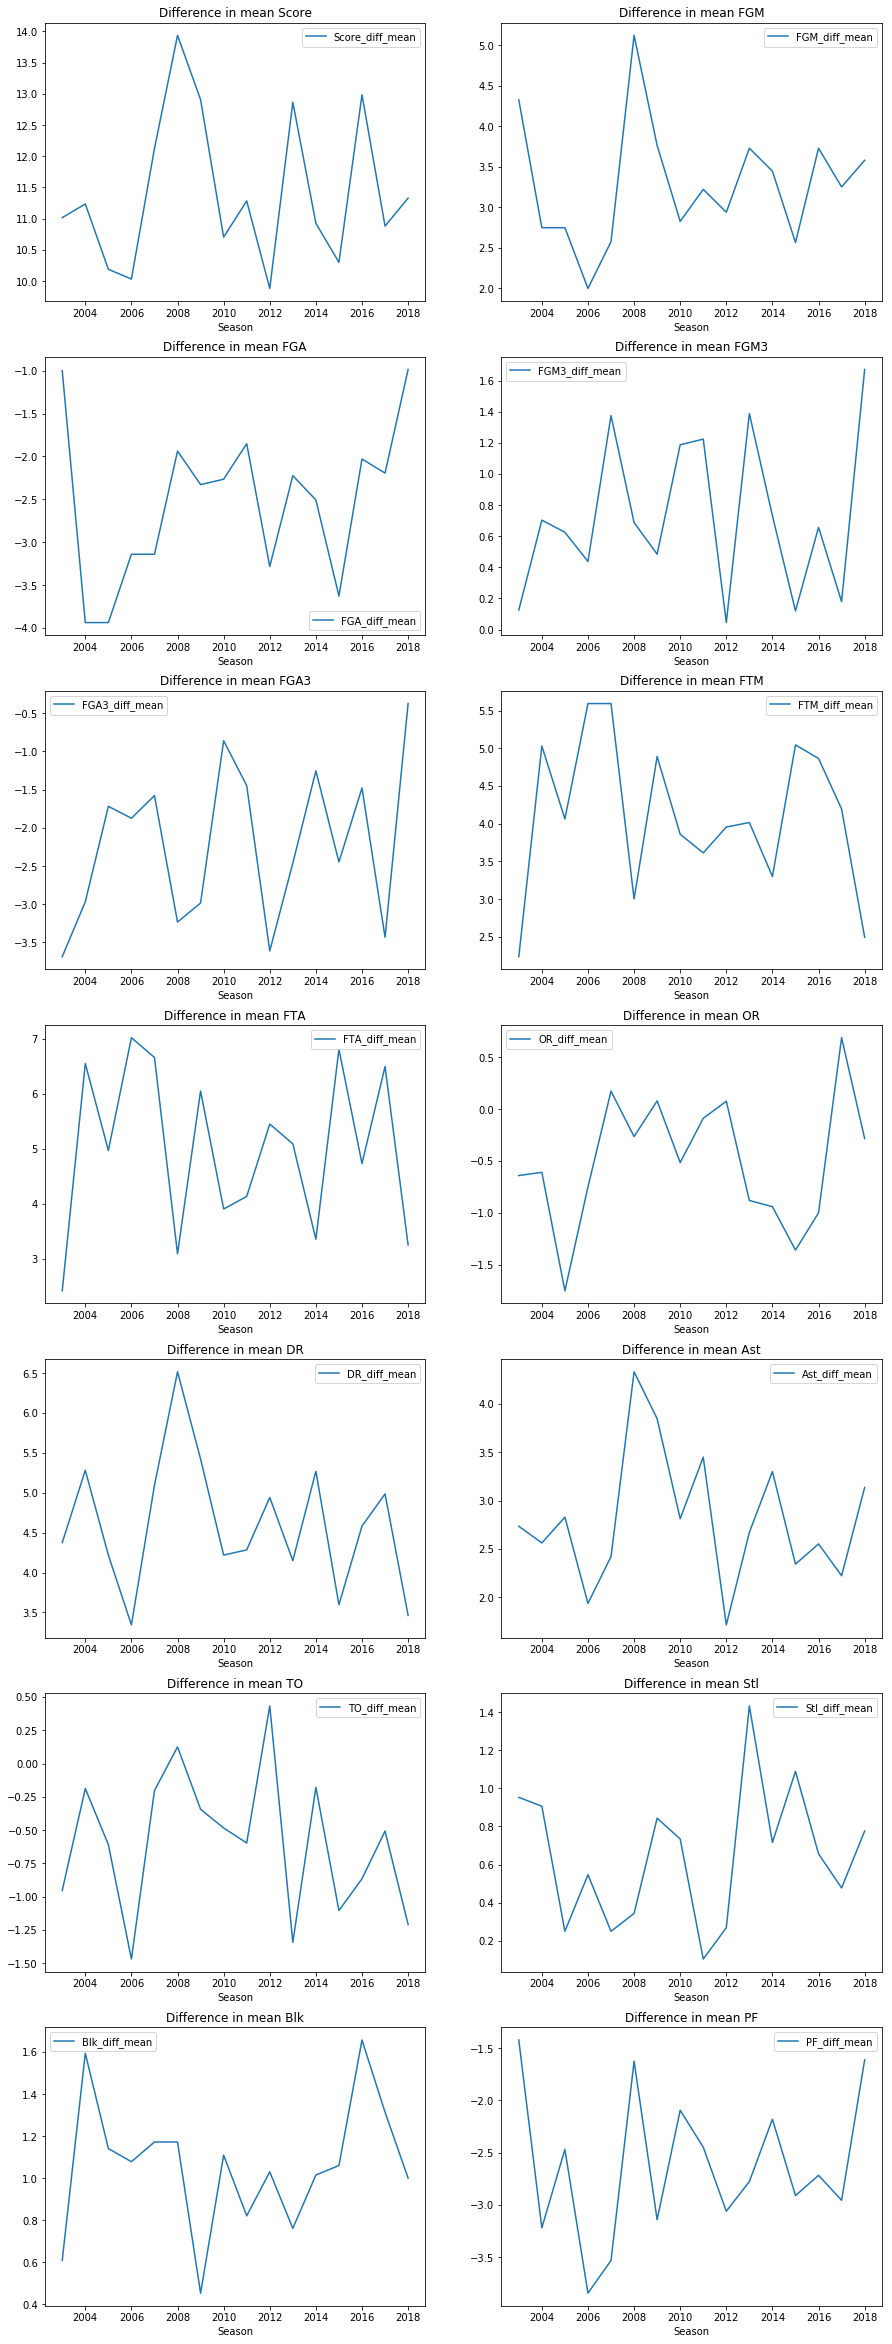

In [166]:
fig, ax= plt.subplots(7,2, figsize=(15, 6*7))

i, j = 0, 0

for col in stats:
    name = col[1:]
    summaries[[c for c in summaries.columns if name+'_diff_mean' in c]].plot(title='Difference in mean '+name,ax=ax[i][j])
    if j == 0:
        j = 1
    else:
        j = 0
        i += 1

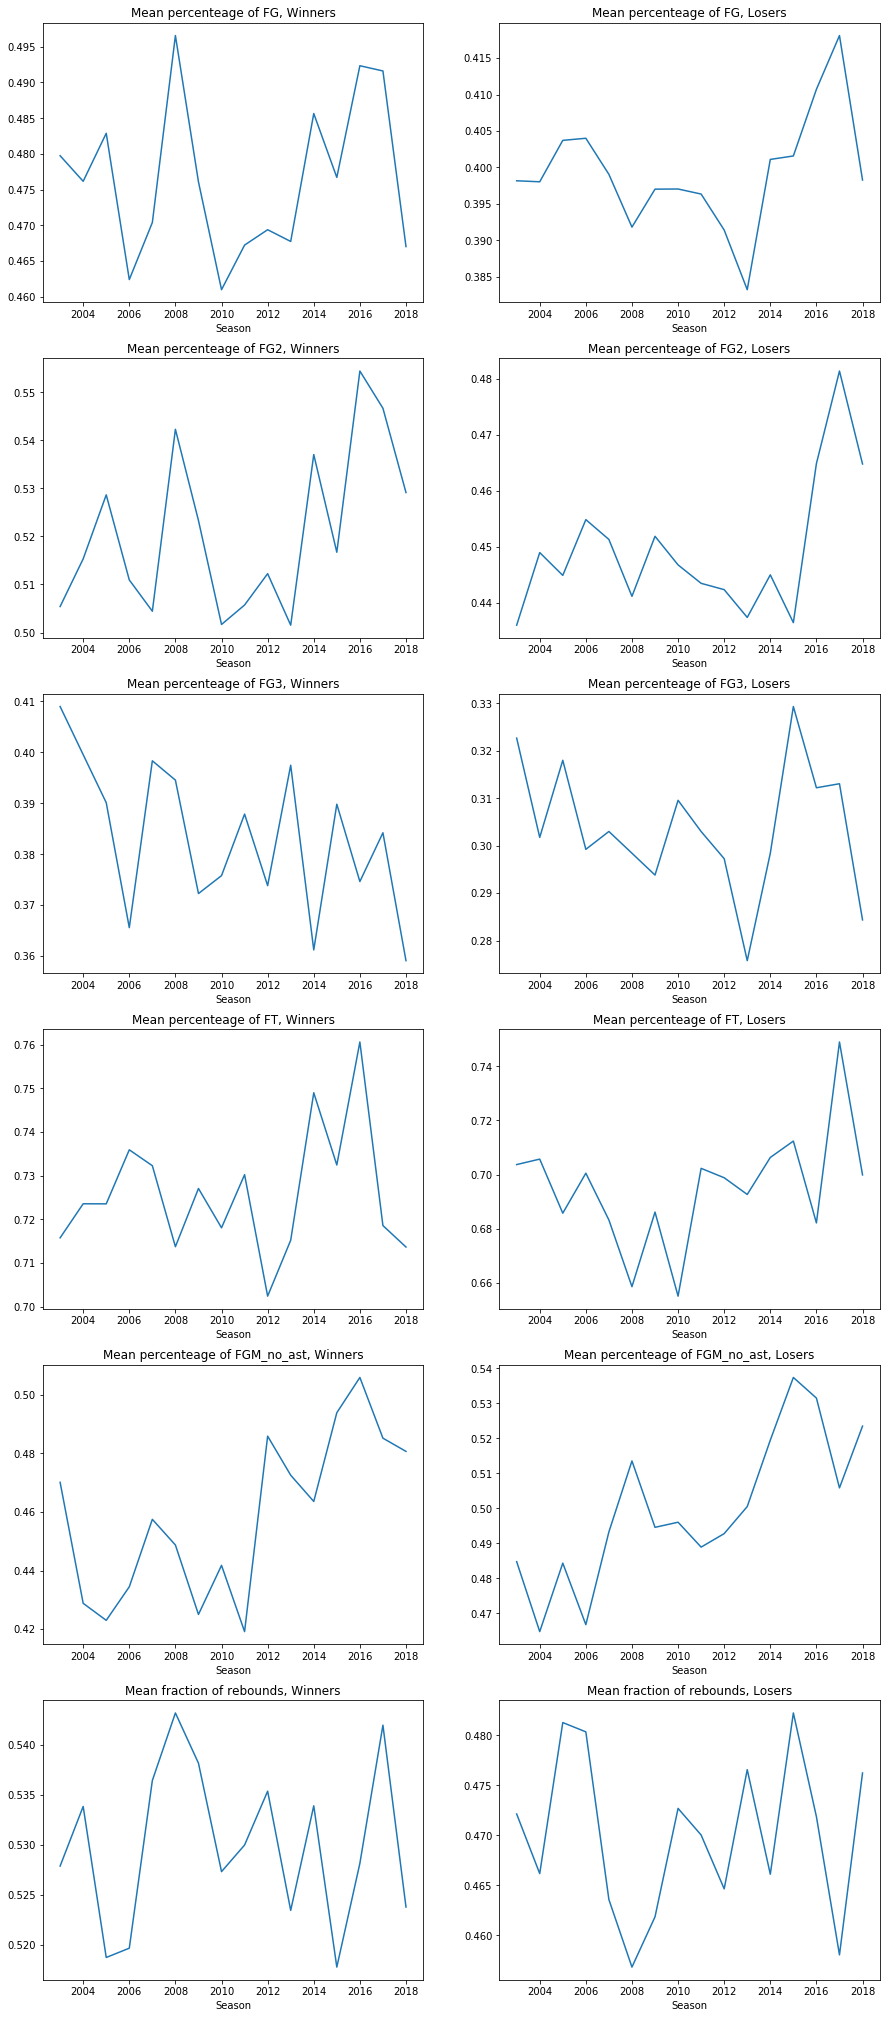

In [167]:
fig, ax= plt.subplots(6,2, figsize=(15, 6*6))

i = 0

for col in [c for c in summaries.columns if '_perc_mean' in c and c.startswith('W')]:
    name = col.split('_perc_')[0][1:]
    summaries[col].plot(title='Mean percenteage of '+name+', Winners',ax=ax[i][0])
    summaries['L'+name+'_perc_mean'].plot(title='Mean percenteage of '+name+', Losers',ax=ax[i][1])
    i += 1
    
summaries['WReb_frac_mean'].plot(title='Mean fraction of rebounds, Winners',ax=ax[i][0])
summaries['LReb_frac_mean'].plot(title='Mean fraction of rebounds, Losers',ax=ax[i][1])

# Seeds

In [45]:
[col for col in men_comp if 'Seed' in col]

['raw_data/mens-machine-learning-competition-2019/DataFiles/NCAATourneySeedRoundSlots.csv',
 'raw_data/mens-machine-learning-competition-2019/DataFiles/NCAATourneySeeds.csv']

In [46]:
seeds = pd.read_csv('raw_data/mens-machine-learning-competition-2019/DataFiles/NCAATourneySeeds.csv')
seeds.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [47]:
slots = pd.read_csv('raw_data/mens-machine-learning-competition-2019/DataFiles/NCAATourneySeedRoundSlots.csv')
slots.head()

,Seed,GameRound,GameSlot,EarlyDayNum,LateDayNum
0,W01,1,R1W1,136,137
1,W01,2,R2W1,138,139
2,W01,3,R3W1,143,144
3,W01,4,R4W1,145,146
4,W01,5,R5WX,152,152


# Rankings

In [48]:
[col for col in men_comp if 'Mass' in col]

['raw_data/mens-machine-learning-competition-2019/MasseyOrdinals.csv']

In [3]:
massey = pd.read_csv('raw_data/mens-machine-learning-competition-2019/MasseyOrdinals.csv')
massey.head()

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
0,2003,35,SEL,1102,159
1,2003,35,SEL,1103,229
2,2003,35,SEL,1104,12
3,2003,35,SEL,1105,314
4,2003,35,SEL,1106,260


In [14]:
tmp = massey[['Season', 'RankingDayNum', 
             'TeamID', 'OrdinalRank']].groupby(['Season', 
                                               'RankingDayNum', 
                                               'TeamID']).agg(['mean', 'max', 'min'])
tmp.columns = ['_'.join(col).strip() for col in tmp.columns.values]
tmp = tmp.reset_index()
tmp.head()

,Season,RankingDayNum,TeamID,OrdinalRank_mean,OrdinalRank_max,OrdinalRank_min
0,2003,35,1102,159.0,159,159
1,2003,35,1103,229.0,229,229
2,2003,35,1104,12.0,12,12
3,2003,35,1105,314.0,314,314
4,2003,35,1106,260.0,260,260


In [15]:
tmp[tmp.OrdinalRank_mean != tmp.OrdinalRank_min]

,Season,RankingDayNum,TeamID,OrdinalRank_mean,OrdinalRank_max,OrdinalRank_min
327,2003,37,1102,118.000000,219,90
328,2003,37,1103,194.187500,253,114
329,2003,37,1104,14.277778,33,2
330,2003,37,1105,300.187500,321,262
331,2003,37,1106,246.187500,288,170
332,2003,37,1107,246.312500,307,187
333,2003,37,1108,219.937500,268,154
334,2003,37,1110,186.625000,219,146
335,2003,37,1111,168.187500,222,123
336,2003,37,1112,13.944444,47,1


In [51]:
massey.RankingDayNum.max()

133

In [56]:
massey.TeamID.value_counts().head()

1181    11031
1242    10990
1314    10881
1257    10843
1277    10828
Name: TeamID, dtype: int64

# play by play

In [52]:
[col for col in men_comp if 'Play' in col]

['raw_data/mens-machine-learning-competition-2019/PlayByPlay_2011/Players_2011.csv',
 'raw_data/mens-machine-learning-competition-2019/PlayByPlay_2011/Events_2011.csv',
 'raw_data/mens-machine-learning-competition-2019/PlayByPlay_2015/Players_2015.csv',
 'raw_data/mens-machine-learning-competition-2019/PlayByPlay_2015/Events_2015.csv',
 'raw_data/mens-machine-learning-competition-2019/PlayByPlay_2018/Players_2018.csv',
 'raw_data/mens-machine-learning-competition-2019/PlayByPlay_2018/Events_2018.csv',
 'raw_data/mens-machine-learning-competition-2019/PlayByPlay_2013/Events_2013.csv',
 'raw_data/mens-machine-learning-competition-2019/PlayByPlay_2013/Players_2013.csv',
 'raw_data/mens-machine-learning-competition-2019/PlayByPlay_2016/Players_2016.csv',
 'raw_data/mens-machine-learning-competition-2019/PlayByPlay_2016/Events_2016.csv',
 'raw_data/mens-machine-learning-competition-2019/PlayByPlay_2012/Events_2012.csv',
 'raw_data/mens-machine-learning-competition-2019/PlayByPlay_2012/Playe

In [53]:
pbp_event = pd.read_csv('raw_data/mens-machine-learning-competition-2019/PlayByPlay_2018/Events_2018.csv')
pbp_event.head()

,EventID,Season,DayNum,WTeamID,LTeamID,WPoints,LPoints,ElapsedSeconds,EventTeamID,EventPlayerID,EventType
0,27543273,2018,11,1104,1272,0,0,15,1104,648148,assist
1,27543274,2018,11,1104,1272,3,0,15,1104,648149,made3_jump
2,27543275,2018,11,1104,1272,0,0,39,1272,650613,turnover
3,27543276,2018,11,1104,1272,0,0,43,1104,648156,miss2_jump
4,27543277,2018,11,1104,1272,0,0,43,1104,648148,reb_off


In [54]:
pbp_play = pd.read_csv('raw_data/mens-machine-learning-competition-2019/PlayByPlay_2018/Players_2018.csv')
pbp_play.head()

,PlayerID,Season,TeamID,PlayerName
0,648095,2018,1101,COBB_CHASE
1,648096,2018,1101,FARQHAR_HAYDEN
2,648097,2018,1101,FARQUHAR_HAYDEN
3,648098,2018,1101,FOSTER_TEVIN
4,648099,2018,1101,FRANKLIN_JAYLEN


# putting things together

In [168]:
reg_season.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,Score_diff,Score_binary,FGM_diff,FGM_binary,FGA_diff,FGA_binary,FGM3_diff,FGM3_binary,FGA3_diff,FGA3_binary,FTM_diff,FTM_binary,FTA_diff,FTA_binary,OR_diff,OR_binary,DR_diff,DR_binary,Ast_diff,Ast_binary,TO_diff,TO_binary,Stl_diff,Stl_binary,Blk_diff,Blk_binary,PF_diff,PF_binary,WFG_perc,WFGM2,WFGA2,WFG2_perc,WFG3_perc,WFT_perc,WTot_Reb,WFGM_no_ast,WFGM_no_ast_perc,LFG_perc,LFGM2,LFGA2,LFG2_perc,LFG3_perc,LFT_perc,LTot_Reb,LFGM_no_ast,LFGM_no_ast_perc,Game_Rebounds,WReb_frac,LReb_frac
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20,6,1,5,1,5,1,1,1,4,1,-5,0,-4,0,4,1,2,1,5,1,5,1,-2,0,-1,0,2,1,0.465517,24,44,0.545455,0.214286,0.611111,38,14,0.518519,0.415094,20,43,0.465116,0.200000,0.727273,32,14,0.636364,70,0.542857,0.457143
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16,7,1,2,1,-5,0,2,1,-4,0,1,1,-1,0,-5,0,3,1,9,1,1,1,-4,0,-2,0,2,1,0.419355,18,42,0.428571,0.400000,0.526316,43,10,0.384615,0.358209,18,43,0.418605,0.250000,0.450000,45,17,0.708333,88,0.488636,0.511364
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23,12,1,2,1,-15,0,5,1,-8,0,3,1,6,1,-14,0,4,1,6,1,-2,0,3,1,-3,0,2,1,0.413793,16,40,0.400000,0.444444,0.586207,43,9,0.375000,0.301370,19,47,0.404255,0.115385,0.608696,53,13,0.590909,96,0.447917,0.552083
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23,6,1,0,0,-11,0,-3,0,-13,0,9,1,16,1,-11,0,-1,0,2,1,-7,0,10,1,-1,0,-5,0,0.473684,15,29,0.517241,0.333333,0.548387,25,7,0.388889,0.367347,12,27,0.444444,0.272727,0.533333,37,9,0.500000,62,0.403226,0.596774
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14,6,1,6,1,-1,0,0,0,-2,0,-6,0,-14,0,-4,0,7,1,0,0,4,1,-3,0,3,1,6,1,0.491803,24,47,0.510638,0.428571,0.846154,39,18,0.600000,0.387097,18,46,0.391304,0.375000,0.629630,36,12,0.500000,75,0.520000,0.480000


In [4]:
reg_s_W = reg_season[['Season', 'DayNum', 'NumOT'] + 
                               [col for col in reg_season.columns if 'W' in col and '_perc' not in col]].copy()
reg_s_W.columns = reg_s_W.columns.str.replace('W','')
reg_s_W.head()

,Season,DayNum,NumOT,TeamID,Score,Loc,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,FGM2,FGA2,Tot_Reb,FGM_no_ast,Reb_frac
0,2003,10,0,1104,68,N,27,58,3,14,11,18,14,24,13,23,7,1,22,24,44,38,14,0.542857
1,2003,10,0,1272,70,N,26,62,8,20,10,19,15,28,16,13,4,4,18,18,42,43,10,0.488636
2,2003,11,0,1266,73,N,24,58,8,18,17,29,17,26,15,10,5,2,25,16,40,43,9,0.447917
3,2003,11,0,1296,56,N,18,38,3,9,17,31,6,19,11,12,14,2,18,15,29,25,7,0.403226
4,2003,11,0,1400,77,N,30,61,6,14,11,13,17,22,12,14,4,4,20,24,47,39,18,0.520000


In [5]:
reg_s_L = reg_season[['Season', 'DayNum', 'NumOT'] + 
                               [col for col in reg_season.columns if 'L' in col and '_perc' not in col]].copy()
reg_s_L.WLoc = reg_s_L.WLoc.map({'N': 'N', 'A': 'H', 'H': 'A'})
reg_s_L.columns = reg_s_L.columns.str.replace('L','')
reg_s_L = reg_s_L.rename(columns={'Woc': 'Loc'})
reg_s_L.head()

,Season,DayNum,NumOT,TeamID,Score,Loc,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,FGM2,FGA2,Tot_Reb,FGM_no_ast,Reb_frac
0,2003,10,0,1328,62,N,22,53,2,10,16,22,10,22,8,18,9,2,20,20,43,32,14,0.457143
1,2003,10,0,1393,63,N,24,67,6,24,9,20,20,25,7,12,8,6,16,18,43,45,17,0.511364
2,2003,11,0,1437,61,N,22,73,3,26,14,23,31,22,9,12,2,5,23,19,47,53,13,0.552083
3,2003,11,0,1457,50,N,18,49,6,22,8,15,17,20,9,19,4,3,23,12,27,37,9,0.596774
4,2003,11,0,1208,71,N,24,62,6,16,17,27,21,15,12,10,7,1,14,18,46,36,12,0.480000


In [6]:
reg_s_tot = pd.concat([reg_s_W, reg_s_L]).sort_values(by=['Season', 'DayNum'])
reg_s_tot.head()

,Season,DayNum,NumOT,TeamID,Score,Loc,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,FGM2,FGA2,Tot_Reb,FGM_no_ast,Reb_frac
0,2003,10,0,1104,68,N,27,58,3,14,11,18,14,24,13,23,7,1,22,24,44,38,14,0.542857
1,2003,10,0,1272,70,N,26,62,8,20,10,19,15,28,16,13,4,4,18,18,42,43,10,0.488636
0,2003,10,0,1328,62,N,22,53,2,10,16,22,10,22,8,18,9,2,20,20,43,32,14,0.457143
1,2003,10,0,1393,63,N,24,67,6,24,9,20,20,25,7,12,8,6,16,18,43,45,17,0.511364
2,2003,11,0,1266,73,N,24,58,8,18,17,29,17,26,15,10,5,2,25,16,40,43,9,0.447917


In [22]:
to_use = [col for col in reg_s_tot.columns if col != 'Loc']

stats = reg_s_tot[to_use].groupby(['Season','TeamID'], as_index=False).rolling(1000, on='DayNum', min_periods=1).mean()


In [23]:
#del stats['Season']
#del stats['TeamID']
stats = stats.reset_index(drop=True)
stats.Season = stats.Season.astype(int)
stats.TeamID = stats.TeamID.astype(int)
stats.head()

,Season,DayNum,NumOT,TeamID,Score,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,FGM2,FGA2,Tot_Reb,FGM_no_ast,Reb_frac
0,2003,19,0.0,1102,47.000000,16.000000,40.000000,6.000000,21.0,9.000000,16.00,3.000000,17.00,8.000000,17.0,2.000000,0.000000,21.0,10.00,19.000000,20.000000,8.00,0.338983
1,2003,22,0.0,1102,59.500000,21.000000,43.000000,10.500000,24.5,7.000000,11.50,4.000000,19.50,13.500000,13.0,4.000000,4.000000,17.0,10.50,18.500000,23.500000,7.50,0.419492
2,2003,25,0.0,1102,58.666667,19.333333,40.666667,9.333333,23.0,10.666667,15.00,3.666667,21.00,12.333333,12.0,4.333333,3.666667,18.0,10.00,17.666667,24.666667,7.00,0.456132
3,2003,27,0.0,1102,55.750000,18.250000,39.250000,9.500000,22.0,9.750000,14.25,3.000000,17.75,12.500000,12.0,4.500000,2.750000,18.5,8.75,17.250000,20.750000,5.75,0.398349
4,2003,31,0.0,1102,57.600000,19.200000,39.400000,11.200000,24.2,8.000000,12.80,3.400000,17.00,14.000000,11.0,5.000000,3.200000,18.0,8.00,15.200000,20.400000,5.20,0.399530


In [186]:
stats_2 = reg_s_tot[to_use].groupby(['Season','TeamID']).rolling(1000, on='DayNum', min_periods=1).sum()
del stats_2['Season']
del stats_2['TeamID']

stats_2 = stats_2.reset_index([0,1]).reset_index(drop=True)

In [189]:
stats_2['FGM_perc'] = stats_2.FGM / stats_2.FGA
stats_2['FGM2_perc'] = stats_2.FGM2 / stats_2.FGA2
stats_2['FGM3_perc'] = stats_2.FGM3 / stats_2.FGA3
stats_2['FT_perc'] = stats_2.FTM / stats_2.FTA
stats_2['FGM_no_ast_perc'] = stats_2.FGM_no_ast / stats_2.FGM

stats_2 = stats_2[['Season', 'TeamID', 'DayNum', 'FGM_perc', 'FGM2_perc', 'FGM3_perc', 'FT_perc', 'FGM_no_ast_perc']].fillna(0)

stats_2.head()

,Season,TeamID,DayNum,FGM_perc,FGM2_perc,FGM3_perc,FT_perc,FGM_no_ast_perc
0,2003,1102,19,0.400000,0.526316,0.285714,0.562500,0.500000
1,2003,1102,22,0.488372,0.567568,0.428571,0.608696,0.357143
2,2003,1102,25,0.475410,0.566038,0.405797,0.711111,0.362069
3,2003,1102,27,0.464968,0.507246,0.431818,0.684211,0.315068
4,2003,1102,31,0.487310,0.526316,0.462810,0.625000,0.270833


In [190]:
stats_tot = pd.merge(stats, stats_2, on=['Season', 'TeamID', 'DayNum'])
stats_tot.head()

,Season,DayNum,NumOT,TeamID,Score,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,FGM2,FGA2,Tot_Reb,FGM_no_ast,Reb_frac,FGM_perc,FGM2_perc,FGM3_perc,FT_perc,FGM_no_ast_perc
0,2003,19,0.0,1102,47.000000,16.000000,40.000000,6.000000,21.0,9.000000,16.00,3.000000,17.00,8.000000,17.0,2.000000,0.000000,21.0,10.00,19.000000,20.000000,8.00,0.338983,0.400000,0.526316,0.285714,0.562500,0.500000
1,2003,22,0.0,1102,59.500000,21.000000,43.000000,10.500000,24.5,7.000000,11.50,4.000000,19.50,13.500000,13.0,4.000000,4.000000,17.0,10.50,18.500000,23.500000,7.50,0.419492,0.488372,0.567568,0.428571,0.608696,0.357143
2,2003,25,0.0,1102,58.666667,19.333333,40.666667,9.333333,23.0,10.666667,15.00,3.666667,21.00,12.333333,12.0,4.333333,3.666667,18.0,10.00,17.666667,24.666667,7.00,0.456132,0.475410,0.566038,0.405797,0.711111,0.362069
3,2003,27,0.0,1102,55.750000,18.250000,39.250000,9.500000,22.0,9.750000,14.25,3.000000,17.75,12.500000,12.0,4.500000,2.750000,18.5,8.75,17.250000,20.750000,5.75,0.398349,0.464968,0.507246,0.431818,0.684211,0.315068
4,2003,31,0.0,1102,57.600000,19.200000,39.400000,11.200000,24.2,8.000000,12.80,3.400000,17.00,14.000000,11.0,5.000000,3.200000,18.0,8.00,15.200000,20.400000,5.20,0.399530,0.487310,0.526316,0.462810,0.625000,0.270833


In [191]:
print(stats.shape)
print(stats_2.shape)
print(stats_tot.shape)

(164082, 23)
(164082, 8)
(164082, 28)


In [192]:
stats_tot.isna().any()

Season             False
DayNum             False
NumOT              False
TeamID             False
Score              False
FGM                False
FGA                False
FGM3               False
FGA3               False
FTM                False
FTA                False
OR                 False
DR                 False
Ast                False
TO                 False
Stl                False
Blk                False
PF                 False
FGM2               False
FGA2               False
Tot_Reb            False
FGM_no_ast         False
Reb_frac           False
FGM_perc           False
FGM2_perc          False
FGM3_perc          False
FT_perc            False
FGM_no_ast_perc    False
dtype: bool

# Extended stats

In [2]:
reg = pd.read_csv('processed_data/game_details_reg_extended.csv')
reg.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,WFG_perc,WFGM2,WFGA2,WFG2_perc,WFG3_perc,WFT_perc,WTot_Reb,WFGM_no_ast,WFGM_no_ast_perc,LFG_perc,LFGM2,LFGA2,LFG2_perc,LFG3_perc,LFT_perc,LTot_Reb,LFGM_no_ast,LFGM_no_ast_perc,Game_Rebounds,WReb_frac,LReb_frac,Game_TO,WTO_frac,LTO_frac,Game_PF,WPF_frac,LPF_frac,WDef_effort,LDef_effort,Score_diff,Score_binary,FGM_diff,FGM_binary,FGA_diff,FGA_binary,FGM3_diff,FGM3_binary,FGA3_diff,FGA3_binary,FTM_diff,FTM_binary,FTA_diff,FTA_binary,OR_diff,OR_binary,DR_diff,DR_binary,Ast_diff,Ast_binary,TO_diff,TO_binary,Stl_diff,Stl_binary,Blk_diff,Blk_binary,PF_diff,PF_binary,FGM2_diff,FGM2_binary,FGA2_diff,FGA2_binary,Tot_Reb_diff,Tot_Reb_binary,FGM_no_ast_diff,FGM_no_ast_binary,Def_effort_diff,Def_effort_binary
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20,0.465517,24,44,0.545455,0.214286,0.611111,38,14,0.518519,0.415094,20,43,0.465116,0.200000,0.727273,32,14,0.636364,70,0.542857,0.457143,41,0.560976,0.439024,42,0.523810,0.476190,96.264151,92.965517,6,1,5,1,5,1,1,1,4,1,-5,0,-4,0,4,1,2,1,5,1,5,1,-2,0,-1,0,2,1,4,1,1,1,6,1,0,0,3.298634,1
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16,0.419355,18,42,0.428571,0.400000,0.526316,43,10,0.384615,0.358209,18,43,0.418605,0.250000,0.450000,45,17,0.708333,88,0.488636,0.511364,25,0.520000,0.480000,34,0.529412,0.470588,131.000000,107.290323,7,1,2,1,-5,0,2,1,-4,0,1,1,-1,0,-5,0,3,1,9,1,1,1,-4,0,-2,0,2,1,0,0,-1,0,-2,0,-7,0,23.709677,1
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23,0.413793,16,40,0.400000,0.444444,0.586207,43,9,0.375000,0.301370,19,47,0.404255,0.115385,0.608696,53,13,0.590909,96,0.447917,0.552083,22,0.454545,0.545455,48,0.520833,0.479167,138.150685,108.724138,12,1,2,1,-15,0,5,1,-8,0,3,1,6,1,-14,0,4,1,6,1,-2,0,3,1,-3,0,2,1,-3,0,-7,0,-10,0,-4,0,29.426547,1
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23,0.473684,15,29,0.517241,0.333333,0.548387,25,7,0.388889,0.367347,12,27,0.444444,0.272727,0.533333,37,9,0.500000,62,0.403226,0.596774,31,0.387097,0.612903,41,0.439024,0.560976,97.102041,96.921053,6,1,0,0,-11,0,-3,0,-13,0,9,1,16,1,-11,0,-1,0,2,1,-7,0,10,1,-1,0,-5,0,3,1,2,1,-12,0,-2,0,0.180988,1
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14,0.491803,24,47,0.510638,0.428571,0.846154,39,18,0.600000,0.387097,18,46,0.391304,0.375000,0.629630,36,12,0.500000,75,0.520000,0.480000,24,0.583333,0.416667,34,0.588235,0.411765,102.548387,66.081967,6,1,6,1,-1,0,0,0,-2,0,-6,0,-14,0,-4,0,7,1,0,0,4,1,-3,0,3,1,6,1,6,1,1,1,3,1,6,1,36.466420,1


In [4]:
not_sum = ['WTeamID', 'DayNum', 'LTeamID']
to_sum = [col for col in reg.columns if col not in not_sum]

summaries = reg[to_sum].groupby(['Season', 'WLoc']).agg(['min', 'max', 'mean', 'median', 'count'])

summaries.columns = ['_'.join(col).strip() for col in summaries.columns.values]
summaries.sample(5)

,,WScore_min,WScore_max,WScore_mean,WScore_median,WScore_count,LScore_min,LScore_max,LScore_mean,LScore_median,LScore_count,NumOT_min,NumOT_max,NumOT_mean,NumOT_median,NumOT_count,WFGM_min,WFGM_max,WFGM_mean,WFGM_median,WFGM_count,WFGA_min,WFGA_max,WFGA_mean,WFGA_median,WFGA_count,WFGM3_min,WFGM3_max,WFGM3_mean,WFGM3_median,WFGM3_count,WFGA3_min,WFGA3_max,WFGA3_mean,WFGA3_median,WFGA3_count,WFTM_min,WFTM_max,WFTM_mean,WFTM_median,WFTM_count,WFTA_min,WFTA_max,WFTA_mean,WFTA_median,WFTA_count,WOR_min,WOR_max,WOR_mean,WOR_median,WOR_count,WDR_min,WDR_max,WDR_mean,WDR_median,WDR_count,WAst_min,WAst_max,WAst_mean,WAst_median,WAst_count,WTO_min,WTO_max,WTO_mean,WTO_median,WTO_count,WStl_min,WStl_max,WStl_mean,WStl_median,WStl_count,WBlk_min,WBlk_max,WBlk_mean,WBlk_median,WBlk_count,WPF_min,WPF_max,WPF_mean,WPF_median,WPF_count,LFGM_min,LFGM_max,LFGM_mean,LFGM_median,LFGM_count,LFGA_min,LFGA_max,LFGA_mean,LFGA_median,LFGA_count,LFGM3_min,LFGM3_max,LFGM3_mean,LFGM3_median,LFGM3_count,LFGA3_min,LFGA3_max,LFGA3_mean,LFGA3_median,LFGA3_count,LFTM_min,LFTM_max,LFTM_mean,LFTM_median,LFTM_count,LFTA_min,LFTA_max,LFTA_mean,LFTA_median,LFTA_count,LOR_min,LOR_max,LOR_mean,LOR_median,LOR_count,LDR_min,LDR_max,LDR_mean,LDR_median,LDR_count,LAst_min,LAst_max,LAst_mean,LAst_median,LAst_count,LTO_min,LTO_max,LTO_mean,LTO_median,LTO_count,LStl_min,LStl_max,LStl_mean,LStl_median,LStl_count,LBlk_min,LBlk_max,LBlk_mean,LBlk_median,LBlk_count,LPF_min,LPF_max,LPF_mean,LPF_median,LPF_count,WFG_perc_min,WFG_perc_max,WFG_perc_mean,WFG_perc_median,WFG_perc_count,...,FGA3_diff_min,FGA3_diff_max,FGA3_diff_mean,FGA3_diff_median,FGA3_diff_count,FGA3_binary_min,FGA3_binary_max,FGA3_binary_mean,FGA3_binary_median,FGA3_binary_count,FTM_diff_min,FTM_diff_max,FTM_diff_mean,FTM_diff_median,FTM_diff_count,FTM_binary_min,FTM_binary_max,FTM_binary_mean,FTM_binary_median,FTM_binary_count,FTA_diff_min,FTA_diff_max,FTA_diff_mean,FTA_diff_median,FTA_diff_count,FTA_binary_min,FTA_binary_max,FTA_binary_mean,FTA_binary_median,FTA_binary_count,OR_diff_min,OR_diff_max,OR_diff_mean,OR_diff_median,OR_diff_count,OR_binary_min,OR_binary_max,OR_binary_mean,OR_binary_median,OR_binary_count,DR_diff_min,DR_diff_max,DR_diff_mean,DR_diff_median,DR_diff_count,DR_binary_min,DR_binary_max,DR_binary_mean,DR_binary_median,DR_binary_count,Ast_diff_min,Ast_diff_max,Ast_diff_mean,Ast_diff_median,Ast_diff_count,Ast_binary_min,Ast_binary_max,Ast_binary_mean,Ast_binary_median,Ast_binary_count,TO_diff_min,TO_diff_max,TO_diff_mean,TO_diff_median,TO_diff_count,TO_binary_min,TO_binary_max,TO_binary_mean,TO_binary_median,TO_binary_count,Stl_diff_min,Stl_diff_max,Stl_diff_mean,Stl_diff_median,Stl_diff_count,Stl_binary_min,Stl_binary_max,Stl_binary_mean,Stl_binary_median,Stl_binary_count,Blk_diff_min,Blk_diff_max,Blk_diff_mean,Blk_diff_median,Blk_diff_count,Blk_binary_min,Blk_binary_max,Blk_binary_mean,Blk_binary_median,Blk_binary_count,PF_diff_min,PF_diff_max,PF_diff_mean,PF_diff_median,PF_diff_count,PF_binary_min,PF_binary_max,PF_binary_mean,PF_binary_median,PF_binary_count,FGM2_diff_min,FGM2_diff_max,FGM2_diff_mean,FGM2_diff_median,FGM2_diff_count,FGM2_binary_min,FGM2_binary_max,FGM2_binary_mean,FGM2_binary_median,FGM2_binary_count,FGA2_diff_min,FGA2_diff_max,FGA2_diff_mean,FGA2_diff_median,FGA2_diff_count,FGA2_binary_min,FGA2_binary_max,FGA2_binary_mean,FGA2_binary_median,FGA2_binary_count,Tot_Reb_diff_min,Tot_Reb_diff_max,Tot_Reb_diff_mean,Tot_Reb_diff_median,Tot_Reb_diff_count,Tot_Reb_binary_min,Tot_Reb_binary_max,Tot_Reb_binary_mean,Tot_Reb_binary_median,Tot_Reb_binary_count,FGM_no_ast_diff_min,FGM_no_ast_diff_max,FGM_no_ast_diff_mean,FGM_no_ast_diff_median,FGM_no_ast_diff_count,FGM_no_ast_binary_min,FGM_no_ast_binary_max,FGM_no_ast_binary_mean,FGM_no_ast_binary_median,FGM_no_ast_binary_count,Def_effort_diff_min,Def_effort_diff_max,Def_effort_diff_mean,Def_effort_diff_median,Def_effort_diff_count,Def_effort_binary_min,Def_effort_binary_max,Def_effort_binary_mean,Def_effort_binary_median,Def_effort_bi

In [11]:
[col for col in summaries.columns if 'Def' in col and 'mean' in col]

['WDef_effort_mean',
 'LDef_effort_mean',
 'Def_effort_diff_mean',
 'Def_effort_binary_mean']

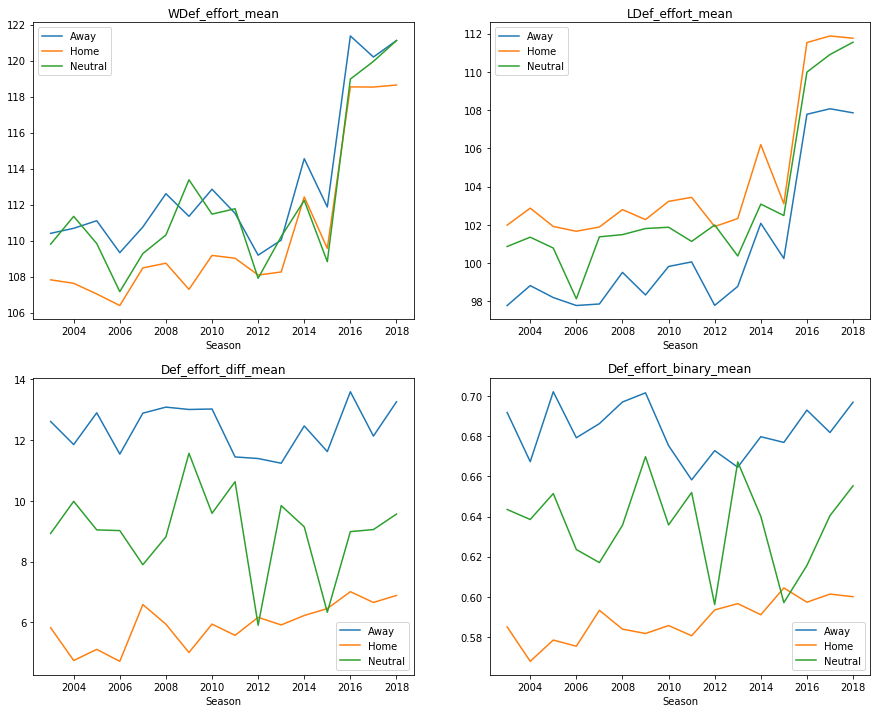

In [12]:
fig, ax= plt.subplots(2,2, figsize=(15, 6*2))

i, j = 0, 0

for col in [col for col in summaries.columns if 'Def' in col and 'mean' in col]:
    summaries[[col]].unstack().plot(title=col,ax=ax[i][j])
    ax[i][j].legend(labels=['Away', 'Home', 'Neutral'])
    if j == 0:
        j = 1
    else:
        j = 0
        i += 1